In [22]:
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import Point

In [4]:
# import all the data from the csv file

station_csv = pd.read_csv(os.path.join("../data/Task2/station_locations.csv"))
incident_csv = pd.read_csv(os.path.join("../data/Task2/wmfs_incidents.csv"))
mobilisation_csv = pd.read_csv(os.path.join("../data/Task2/wmfs_mobilisations.csv"))

In [5]:
# rename the columns for the station_csv
station_csv.columns=['Station name', 'Sta_Easting', 'Sta_Northing', 'PRL_Count', 'BRV_Count',
       'Closed (Y/N)', 'Opened', 'Closed']
station_csv.sample(5)

,Station name,Sta_Easting,Sta_Northing,PRL_Count,BRV_Count,Closed (Y/N),Opened,Closed
28,Solihull,414377,279802,1,1,N,Before study period,NaN
5,Binley,436876,278691,1,1,N,Before study period,NaN
31,Tettenhall,388415,300090,1,0,N,Before study period,NaN
12,Dudley,392914,291534,1,1,N,Before study period,NaN
15,Foleshill,434545,282370,1,1,N,Before study period,NaN


In [6]:
# create new columns for the mobilisation_csv, to get the time of the day, the day of the week and the month, from the 'call_time' of the mobilisation
mobilisation_csv['call_time'] = pd.to_datetime(mobilisation_csv['call_time'])
mobilisation_csv['call_hour'] = mobilisation_csv['call_time'].dt.hour
mobilisation_csv['call_day'] = mobilisation_csv['call_time'].dt.dayofweek
mobilisation_csv['call_month'] = mobilisation_csv['call_time'].dt.month
mobilisation_csv['call_year'] = mobilisation_csv['call_time'].dt.year
mobilisation_csv.sample(5)

,Incident_Number,callsign_type,call_time,callsign_station,initial_incident_type,incident_classification_label,incident_profile_label,incident_classification_level1,call_seconds,reaction_seconds,driving_seconds,on_scene_seconds,EASTINGS,NORTHINGS,call_hour,call_day,call_month,call_year
520325,395356,BRV,2023-06-21 17:55:34,Aston,SECONDARY FIRE,Accidental rubbish fire,Secondary Fires that attract a 20 minute-respo...,FIRE,101,80,NaN,264,407136.476854,292854.241790,17,2,6,2023
130816,120672,PRL,2012-11-08 18:20:56,Solihull,MOTORWAY CAR,Accidental fire in a vehicle,Medium Risk,FIRE,139,109,769.0,1475,420012.629440,282981.486663,18,3,11,2012
305283,243598,BRV,2017-10-18 19:37:09,Wolverhampton,SECONDARY FIRE,Secondary fire resulting from deliberately set...,Secondary Fires that attract a 20 minute-respo...,FIRE,60,20,617.0,1345,396614.457204,297085.541643,19,2,10,2017
357780,281551,PRL,2019-03-20 05:24:23,Billesley,SECONDARY FIRE,False alarm raised with malicious intent,False Alarms,FALSE_ALARM,185,80,239.0,571,410517.328122,281961.196775,5,2,3,2019
507735,386750,BRV,2023-03-02 03:43:32,Fallings Park,LOW RISE FIRE,Accidental Dwelling Fires,High Risk,FIRE,99,111,NaN,404,390351.077354,298109.825980,3,3,3,2023


In [7]:
# create new columns for the incident_csv, to get the time of the day, the day of the week and the month, from the 'call_time' of the incident
incident_csv['call_time'] = pd.to_datetime(incident_csv['call_time'])
incident_csv['call_hour'] = incident_csv['call_time'].dt.hour
incident_csv['call_day'] = incident_csv['call_time'].dt.dayofweek
incident_csv['call_month'] = incident_csv['call_time'].dt.month
incident_csv['call_year'] = incident_csv['call_time'].dt.year
incident_csv.sample(5)

,call_time,incident_classification_label,incident_profile_label,incident_classification_level1,prl_count,brv_count,EASTINGS,NORTHINGS,call_seconds,reaction_seconds,driving_seconds,call_hour,call_day,call_month,call_year
319571,2022-08-12 19:59:48,Deliberate Vehicle Fires,Medium Risk,FIRE,1,0,410075.184564,279199.373864,94,55,287.0,19,4,8,2022
236752,2019-06-18 20:26:56,False alarm raised with good intent,False Alarms,FALSE_ALARM,1,0,399671.595922,291046.663385,76,84,256.0,20,1,6,2019
322913,2022-09-17 20:32:55,False Alarms (Equipment),Low Risk,FALSE_ALARM,1,1,402183.231747,287806.157469,58,51,289.0,20,5,9,2022
173107,2017-02-20 17:22:43,Secondary fire resulting from deliberately set...,Secondary Fires that attract a 20 minute-respo...,FIRE,0,1,416333.153206,288223.007279,207,160,837.0,17,0,2,2017
25708,2010-11-06 11:27:19,False alarm raised with good intent,False Alarms,FALSE_ALARM,2,0,407234.569023,285804.604060,161,52,130.0,11,5,11,2010


In [8]:
# join the station_csv to the mobilisation_csv, by the 'Station name' column in station_csv and 'callsign_station' in mobilisation_csv
mobilisation_csv = mobilisation_csv.merge(station_csv, left_on='callsign_station', right_on='Station name', how='left')
mobilisation_csv.sample(5)

,Incident_Number,callsign_type,call_time,callsign_station,initial_incident_type,incident_classification_label,incident_profile_label,incident_classification_level1,call_seconds,reaction_seconds,...,call_month,call_year,Station name,Sta_Easting,Sta_Northing,PRL_Count,BRV_Count,Closed (Y/N),Opened,Closed
277206,223091,BRV,2017-01-11 14:18:49,Dudley,RTC,Road Traffic Collision,High Risk,RTC,151,69,...,1,2017,Dudley,392914.0,291534.0,1.0,1.0,N,Before study period,NaN
480366,368092,PRL,2022-07-13 20:07:21,Billesley,FIRE PR,False Alarms (Equipment),False Alarms,FALSE_ALARM,160,68,...,7,2022,Billesley,409029.0,281369.0,1.0,1.0,N,Before study period,NaN
225554,187092,BRV,2015-07-22 20:44:11,Perry Barr,MOTORBIKE FIRE,Accidental fire in a vehicle,Medium Risk,FIRE,64,90,...,7,2015,Perry Barr,408405.0,293078.0,1.0,1.0,N,Before study period,NaN
497438,379865,BRV,2022-11-25 04:21:28,Wolverhampton,SECONDARY FIRE,Deliberate Rubbish Fires,Secondary Fires that attract a 20 minute-respo...,FIRE,101,88,...,11,2022,Wolverhampton,390873.0,297977.0,1.0,1.0,N,Before study period,NaN
326973,259208,BRV,2018-06-06 16:20:26,Hay Mills,CAR FIRE,Accidental fire in a vehicle,Medium Risk,FIRE,77,27,...,6,2018,Hay Mills,411478.0,284683.0,1.0,1.0,N,Before study period,NaN


In [9]:
mobilisation_csv.to_csv(os.path.join("../data/processed/mobilisation.csv"), index=False)

incident_csv.to_csv(os.path.join("../data/processed/incident.csv"), index=False)

In [10]:
# filter all the rows in the mobilisation_csv where the 'call_time' is between 2012-03-31 and 2012-04-02
mobilisation_test = mobilisation_csv[(mobilisation_csv['call_time'] >= '2012-03-31') ]
mo_test_uniq = mobilisation_test['callsign_station'].unique()

In [11]:
mo_test_uniq.shape

(49,)

In [12]:
mobi_station_info = mobilisation_csv['callsign_station'].unique()
station_info = station_csv['Station name'].unique()

In [13]:
# check the difference between the two lists
difference = list(set(mobi_station_info) - set(station_info))
difference

['Brewood',
 'Cannock',
 'Sandyford',
 'Tamworth',
 'Chase Terrace',
 'Lichfield',
 'Barton-Under-Needwood',
 'Wombourne',
 'Rugeley',
 'Kinver',
 'Codsall']

In [14]:
"""
for i in difference:
    print(i)
    count = mobilisation_csv[mobilisation_csv['callsign_station'] == i].shape[0]
    print(count)
"""

"\nfor i in difference:\n    print(i)\n    count = mobilisation_csv[mobilisation_csv['callsign_station'] == i].shape[0]\n    print(count)\n"

In [15]:
# filter all the rows in the mobilisation_csv where the 'call_time' is after 2014-08-05
mobilisation_14_22 = mobilisation_csv[(mobilisation_csv['call_time'] > '2014-08-05') & (mobilisation_csv['call_time'] < '2022-12-31')]

In [16]:
mobilisation_14_22_sta = mobilisation_14_22[mobilisation_14_22['callsign_station'].isin(station_info)]

In [17]:
mobilisation_14_22_sta['callsign_station'].unique().shape

(38,)

In [18]:
mobilisation_14_22_sta.to_csv(os.path.join("../data/processed/mobilisation_14_22.csv"), index=False)

In [19]:
incident_csv_14_22 = incident_csv[(incident_csv['call_time'] > '2014-08-05') & (incident_csv['call_time'] < '2022-12-31')]

In [20]:
incident_csv_14_22.sample(5)

,call_time,incident_classification_label,incident_profile_label,incident_classification_level1,prl_count,brv_count,EASTINGS,NORTHINGS,call_seconds,reaction_seconds,driving_seconds,call_hour,call_day,call_month,call_year
233389,2019-05-05 11:56:43,False Alarms (Equipment),Low Risk,FALSE_ALARM,1,0,414795.169218,289395.210555,54,40,246.0,11,6,5,2019
234396,2019-05-18 19:01:23,False Alarms (Equipment),Low Risk,FALSE_ALARM,0,1,403610.796964,280198.833620,32,32,198.0,19,5,5,2019
308235,2022-04-09 13:15:27,Secondary fire resulting from deliberately set...,Secondary Fires that attract a 20 minute-respo...,FIRE,0,1,395741.185907,292722.454968,96,83,428.0,13,5,4,2022
211406,2018-07-15 17:18:13,Accidental rubbish fire,Secondary Fires that attract a 20 minute-respo...,FIRE,0,1,391427.938478,297926.335260,62,20,277.0,17,6,7,2018
144677,2015-12-17 13:45:31,False alarm raised with good intent,False Alarms,FALSE_ALARM,1,1,402162.969753,288387.580178,109,47,154.0,13,3,12,2015


In [31]:
# turn the incident_csv_14_22 into a gpd dataframe


geometry = [Point(xy) for xy in zip(incident_csv_14_22['EASTINGS'], incident_csv_14_22['NORTHINGS'])]
incident_gpd = gpd.GeoDataFrame(incident_csv_14_22, crs="EPSG:27700", geometry=geometry)

<Axes: >

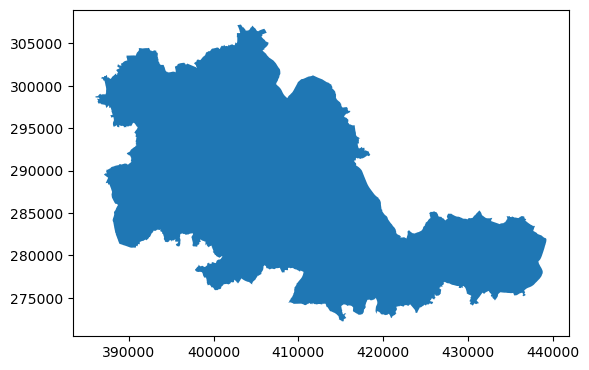

In [32]:
# import the shp file for the bournoundaries
boundary = gpd.read_file(os.path.join("../data/westmidslands/westmidlands.shp"))
# plot the boundary
boundary.plot()

<Axes: >

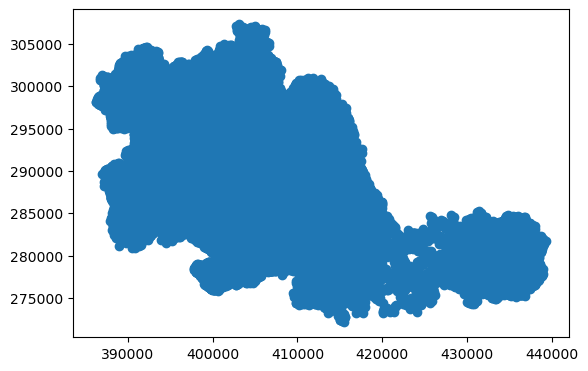

In [33]:
incident_gpd.plot()

C:\Users\SBH\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

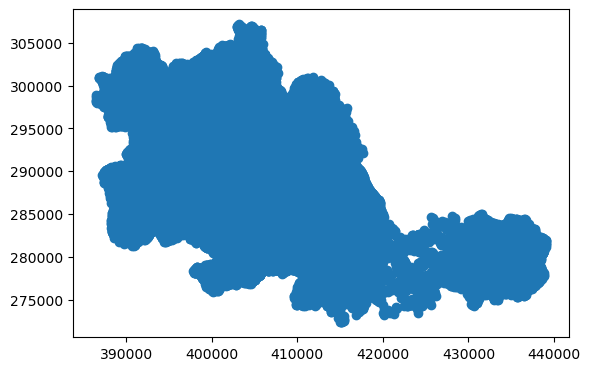

In [34]:
# using the boundary to filter all the points from the inciden_gpd tha are within the boundary of the west midlands, and save the new gpd as incident_wmids
incident_wmids = gpd.sjoin(incident_gpd, boundary, op='within')
incident_wmids.plot()

In [35]:
# delete the geometry column from the incident_wmids, and save the rest of the columns as a csv file
incident_wmids.drop(columns=['geometry'], inplace=True)
# drop the DESCRIPTIO and name columns
incident_wmids.drop(columns=['DESCRIPTIO', 'NAME'], inplace=True)
incident_wmids.to_csv(os.path.join("../data/processed/incident_wmids_14_22.csv"), index=False)

In [61]:
incident_csv_14_22.to_csv(os.path.join("../data/processed/incident_14_22.csv"), index=False)

In [ ]:
station_csv = pd.read_csv(os.path.join("..","data","Task2","station_locations.csv"))
station_csv.sample(5)
# drop the rows where station name is "Cradley Heath" or "Halesowen"
station_38 = station_csv[~station_csv["Station name"].isin(["Cradley Heath", "Halesowen"])]
station_38.shape

In [ ]:
station_38.to_csv(os.path.join("..","data","processed","station_locations_38.csv"), index=False)